## Introduction:

How much did you weight at birth? If you don’t know, call your mother or someone else who knows. Using the pooled data (all live births), compute the distribution of birth weights and use it to find your percentile rank. 

If you were a first baby, find your percentile rank in the distribution for first babies. Otherwise use the distribution for others. If you are in the 90th percentile or higher, call your mother back and apologize.

In [2]:
import Cdf
import numpy as np
import score_example
import itertools
# import pandas as pd
import survey
import first
import matplotlib.pyplot as plt
%matplotlib inline 

## Load Data:

In [3]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [4]:
# outcome_[1:10]  # 1 represents alive case

In [5]:
partitions = first.PartitionRecords(table)
partitions  # divide the data to firsts, others .. 

(<survey.Pregnancies at 0x7f7b6a5d4350>,
 <survey.Pregnancies at 0x7f7b6a5d4390>)

In [6]:
first_baby = partitions[0]
others = partitions[1]
len(first_baby), len(others)

(4413, 4735)

In [7]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7f7b6a5d48d0>,
 <survey.Pregnancies at 0x7f7b697e42d0>)

In [8]:
## I have to try Dr's way as a more effecient way .. 

first_baby_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_[i] = firsts_table.records[i].birthwgt_oz
    except ValueError:
        first_baby_[i] = 0

In [9]:
# first_baby_[1:10]

In [10]:
others_baby_ = np.zeros([len(others_table.records), 1])

for i in xrange(len(others_table.records)):
    try:
        others_baby_[i] = others_table.records[i].birthwgt_oz
    except ValueError:
        others_baby_[i] = 0

In [11]:
# others_baby_[1:10]

## Let's Calculate CDFs:

### 1st Babies:

In [12]:
merged = list(itertools.chain(*first_baby_))
len(merged)

4413

In [13]:
cdf_first = Cdf.MakeCdfFromList(merged)
# cdf_first.Items()[1:10]

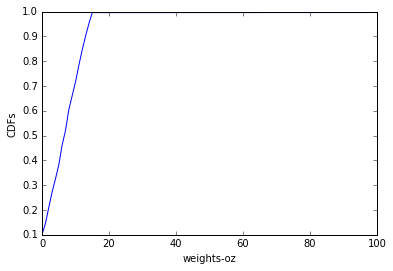

In [16]:
plt.plot(cdf_first.xs, cdf_first.ps)
plt.xlabel('weights-oz')
plt.ylabel('CDFs')

Why only 50 cases were drawn !! :S

### Others:

In [17]:
merged_others = list(itertools.chain(*others_baby_))
len(merged_others)

4735

In [18]:
cdf_others = Cdf.MakeCdfFromList(merged_others)

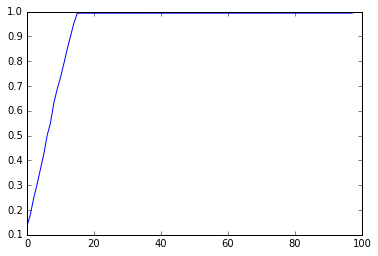

In [19]:
plt.plot(cdf_others.xs, cdf_others.ps)
plt.xlabel('weights-oz')
plt.ylabel('CDFs')

### Let's plot both curves togther to compare their distributions:

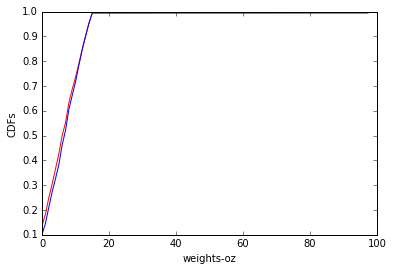

In [21]:
plt.plot(cdf_others.xs, cdf_others.ps, 'r', cdf_first.xs, cdf_first.ps, 'b')
plt.xlabel('weights-oz')
plt.ylabel('CDFs')

Blue ==> First_babies,   Red ==> Others 

- The shape of the distributions looks alike that one demonestrated in the textbook .. 

- We can see that first babies are slightly lighter throughout the distribution, with a larger discrepancy above the mean.

## Allocating my weight on the Cdf curve:

I were the first baby .. hence, I'll allocate my weight over the 1st babies curve .. and calculate my percentile rank ..  

In [22]:
def Percentile_Rank(scores, your_score):
    count = 0
    
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    
    return percentile_rank

In [26]:
My_weight = 10
perc_rank = Percentile_Rank(first_baby_, My_weight)
perc_rank

71.7199184228416

This means that my weight is higher than 71.7% of the 1st babies ..  